In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import wfdb
import ast
import joblib

import sys
sys.path.append('..')
from Models import load_functions as f

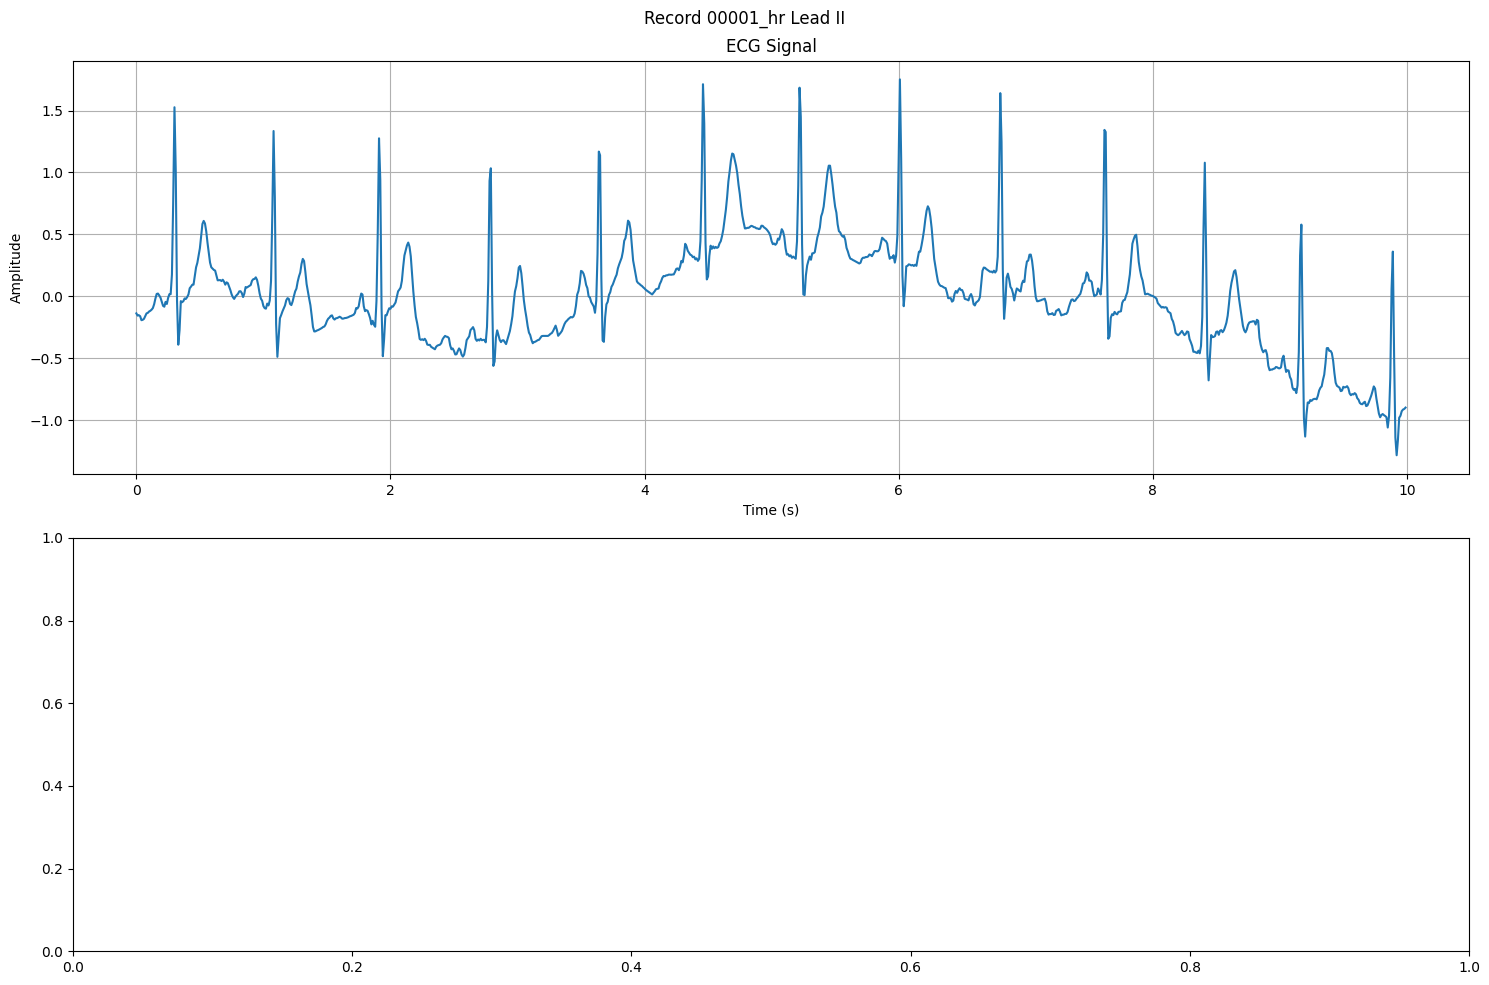

In [2]:
path = '../data/physionet.org/files/ptb-xl/1.0.3/records100/00000/'
ecg = '00004_lr'
file = path + ecg
metadata = pd.read_csv('../data/cleaned_metadata.csv', index_col=0)

signals, fields = wfdb.rdsamp(file, channels=[1])

sampling_frequency = fields['fs']  # Sampling frequency
sig_len = fields['sig_len'] # Signal length 
sig_name = fields['sig_name'] # Lead

time = np.arange(0, sig_len) / sampling_frequency

# First we get the sampling interval 
dt = 1/sampling_frequency

# Flatten the signal from 2D to 1D 
signals = signals.flatten()

# FFT returns a result not centered at zero, therefore we need to fftshift it to zero
signal_fft = np.fft.fftshift(np.fft.fft(signals) * dt)
freq = np.fft.fftshift(np.fft.fftfreq(sig_len, dt))

fig, ax = plt.subplots(2, 1, figsize=(15,10))

fig.suptitle("Record 00001_hr Lead %s" % (sig_name[0]))
ax[0].plot(time, signals)
ax[0].set_title('ECG Signal')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].grid(True)
# ax[1].plot(freq, np.abs(signal_fft))
# ax[1].set_xlabel('Frequency (Hz)')
# ax[1].set_ylabel('Amplitude')
# ax[1].set_title('Fourier Transform')
# ax[1].set_xlim(0, 100)
fig.tight_layout()

In [3]:
signals.shape

(1000,)

In [4]:
metadata.head()

,patient_id,age,sex,height,weight,baseline_drift,static_noise,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
0,15709.0,56.0,1,161.0,63.0,0,I-V1,0,3,records100/00000/00001_lr,records500/00000/00001_hr,['NORM']
1,20372.0,37.0,1,161.0,69.0,0,0,0,5,records100/00000/00003_lr,records500/00000/00003_hr,['NORM']
2,17014.0,24.0,0,173.3,82.0,"II,III,AVF",0,0,3,records100/00000/00004_lr,records500/00000/00004_hr,['NORM']
3,17448.0,19.0,1,161.0,70.0,"III,AVR,AVF",0,0,4,records100/00000/00005_lr,records500/00000/00005_hr,['NORM']
4,19005.0,18.0,1,161.0,58.0,V1,0,0,4,records100/00000/00006_lr,records500/00000/00006_hr,['NORM']


In [5]:
np.sort(metadata['weight'].unique())

array([  5.,  12.,  16.,  17.,  19.,  20.,  25.,  31.,  32.,  33.,  35.,
        36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,
        47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,
        58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,
        69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
       102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
       113., 114., 115., 116., 117., 118., 120., 124., 125., 128., 130.,
       131., 132., 134., 135., 137., 139., 140., 142., 150., 158., 160.,
       162., 163., 164., 169., 178., 179., 180., 183., 185., 200., 250.])

In [6]:
prediction = model.predict(signals.reshape(-1, 1000, 1).astype("float"))

NameError: name 'model' is not defined

In [7]:
joblib.dump(model, 'new_model.pkl')

NameError: name 'model' is not defined

In [8]:
%pip install streamlit

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
aiohttp                   3.9.3
aiosignal                 1.3.1
altair                    5.3.0
anyio                     4.3.0
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
async-timeout             4.0.3
attrs                     23.2.0
Babel                     2.14.0
backcall                  0.2.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.7.0
Bottleneck                1.3.4
Brotli                    1.1.0
cached-property           1.5.2
cachetools                4.2.4
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                

In [7]:
%pip uninstall keras
%pip install keras

Found existing installation: keras 2.7.0
Uninstalling keras-2.7.0:
  Would remove:
    /Users/ChanFamily/opt/anaconda3/envs/ecgcap/lib/python3.8/site-packages/keras-2.7.0.dist-info/*
    /Users/ChanFamily/opt/anaconda3/envs/ecgcap/lib/python3.8/site-packages/keras/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [37]:
metadata = pd.read_csv('../data/cleaned_metadata.csv', index_col=0)

In [46]:
metadata

,patient_id,age,sex,height,weight,baseline_drift,static_noise,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
0,15709.0,56.0,1,161.0,63.0,0,I-V1,0,3,records100/00000/00001_lr,records500/00000/00001_hr,['NORM']
1,20372.0,37.0,1,161.0,69.0,0,0,0,5,records100/00000/00003_lr,records500/00000/00003_hr,['NORM']
2,17014.0,24.0,0,173.3,82.0,"II,III,AVF",0,0,3,records100/00000/00004_lr,records500/00000/00004_hr,['NORM']
3,17448.0,19.0,1,161.0,70.0,"III,AVR,AVF",0,0,4,records100/00000/00005_lr,records500/00000/00005_hr,['NORM']
4,19005.0,18.0,1,161.0,58.0,V1,0,0,4,records100/00000/00006_lr,records500/00000/00006_hr,['NORM']
...,...,...,...,...,...,...,...,...,...,...,...,...
15672,11905.0,55.0,1,161.0,63.0,0,0,0,9,records100/21000/21831_lr,records500/21000/21831_hr,['NORM']
15673,17180.0,67.0,1,161.0,63.0,0,alles,0,7,records100/21000/21833_lr,records500/21000/21833_hr,['STTC']
15674,20703.0,300.0,0,173.3,77.0,0,0,0,4,records100/21000/21834_lr,records500/21000/21834_hr,['NORM']
15675,8873.0,64.0,1,161.0,63.0,0,0,0,8,records100/21000/21836_lr,records500/21000/21836_hr,['NORM']


In [36]:
age = 37
sex = 1
height = 161
weight = 69


metadata = metadata[(metadata['age'] == age) & 
                    (metadata['sex'] == sex) & 
                    (metadata['height'] == height) &
                    (metadata['weight'] == weight)]

metadata.head()

,patient_id,age,sex,height,weight,baseline_drift,static_noise,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
1,20372.0,37.0,1,161.0,69.0,0,0,0,5,records100/00000/00003_lr,records500/00000/00003_hr,['NORM']


In [6]:
metadata.head(10)

,patient_id,age,sex,height,weight,baseline_drift,static_noise,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
1,20372.0,37.0,1,161.0,69.0,0,0,0,5,records100/00000/00003_lr,records500/00000/00003_hr,['NORM']
35,16750.0,37.0,1,161.0,63.0,0,I-AVR,0,9,records100/00000/00051_lr,records500/00000/00051_hr,['NORM']
61,11314.0,37.0,1,161.0,56.0,0,I-AVR,0,4,records100/00000/00083_lr,records500/00000/00083_hr,['NORM']
123,8595.0,37.0,1,161.0,60.0,0,alles,0,5,records100/00000/00174_lr,records500/00000/00174_hr,['NORM']
138,20434.0,37.0,0,173.3,77.0,0,0,0,8,records100/00000/00194_lr,records500/00000/00194_hr,['NORM']
152,14751.0,37.0,0,173.3,77.0,0,0,0,2,records100/00000/00209_lr,records500/00000/00209_hr,"['CD', 'STTC']"
264,19088.0,37.0,0,173.3,78.0,0,0,0,9,records100/00000/00354_lr,records500/00000/00354_hr,['NORM']
340,19697.0,37.0,0,173.3,90.0,0,0,0,6,records100/00000/00451_lr,records500/00000/00451_hr,['NORM']
385,13237.0,37.0,0,173.3,77.0,V4,0,0,10,records100/00000/00516_lr,records500/00000/00516_hr,"['STTC', 'HYP']"
436,15114.0,37.0,0,173.3,88.0,0,0,0,5,records100/00000/00588_lr,records500/00000/00588_hr,['CD']


In [31]:
metadata.shape

(2, 12)

In [17]:
path = '../data/physionet.org/files/ptb-xl/1.0.3/'

In [54]:
temp_path = metadata.sample()['filename_lr']
temp_path.iloc[0]

'records100/09000/09736_lr'

In [11]:
signals = wfdb.rdsamp(path + 'records100/01000/01106_lr')

In [27]:
signal = f.grab_sample(37, 1, 161, 69, path, metadata)